# Faceting
One general visualization technique that will be useful for you to know about to handle plots of two or more variables is **faceting**. In faceting, the data is divided into disjoint subsets, most often by different levels of a categorical variable. For each of these subsets of the data, the same plot type is rendered on other variables. Faceting is a way of comparing distributions or relationships across levels of additional variables, especially when there are three or more variables of interest overall. While faceting is most useful in multivariate visualization, it is still valuable to introduce the technique here in our discussion of bivariate plots.

For example, rather than depicting the relationship between one numeric variable and one categorical variable using a violin plot or box plot, we could use faceting to look at a histogram of the numeric variable for subsets of the data divided by categorical variable levels. Seaborn's [`FacetGrid`](https://seaborn.pydata.org/generated/seaborn.FacetGrid.html) class facilitates the creation of faceted plots. There are two steps involved in creating a faceted plot. First, we need to create an instance of the FacetGrid object and specify the feature we want to facet by (vehicle class, "VClass" in our example). Then we use the `map` method on the FacetGrid object to specify the plot type and variable(s) that will be plotted in each subset (in this case, the histogram on combined fuel efficiency "comb").

## Example 1.

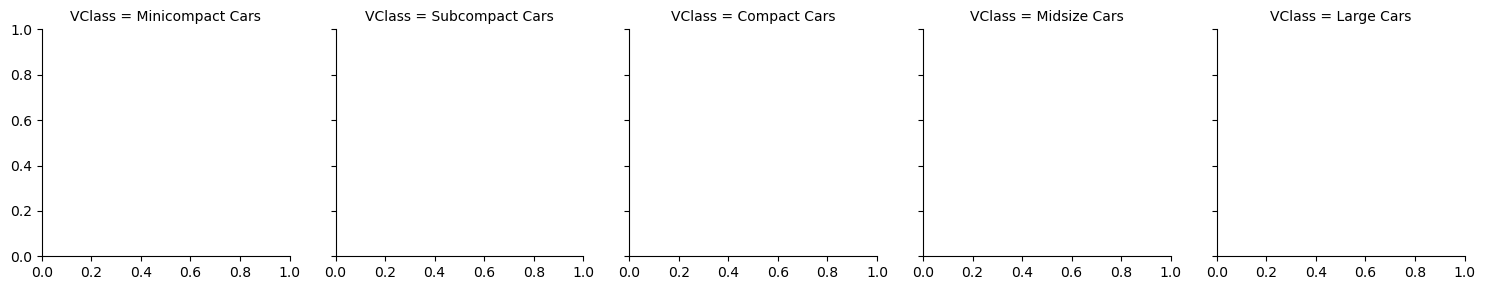

In [10]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

%matplotlib inline

# Preparatory Step
fuel_econ = pd.read_csv('fuel_econ.csv')

# Convert the "VClass" column from a plain object type into an ordered categorical type
sedan_classes = ['Minicompact Cars', 'Subcompact Cars', 'Compact Cars', 'Midsize Cars', 'Large Cars']
vclasses = pd.api.types.CategoricalDtype(ordered=True, categories=sedan_classes)
fuel_econ['VClass'] = fuel_econ['VClass'].astype(vclasses);

# Plot the Seaborn's FacetGrid
g = sb.FacetGrid(data = fuel_econ, col = 'VClass')

plt.show()

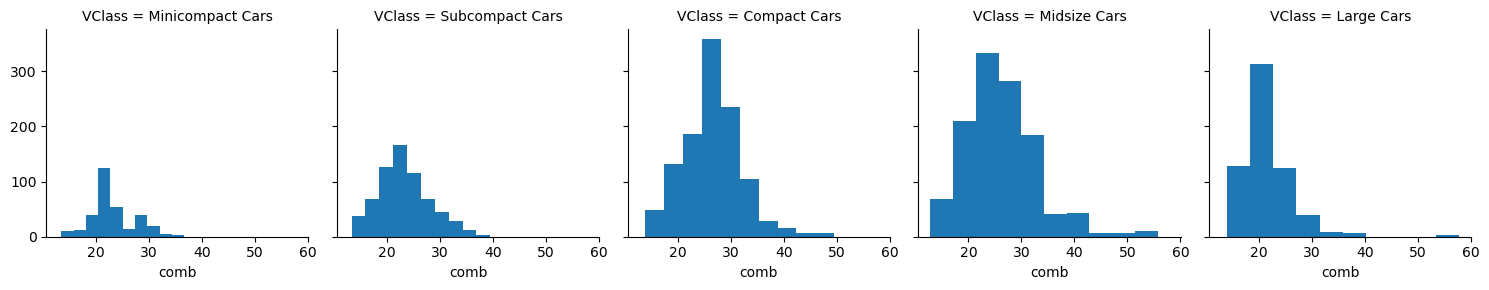

In [14]:
g.map(plt.hist, "comb")
plt.show()

## Example 2.

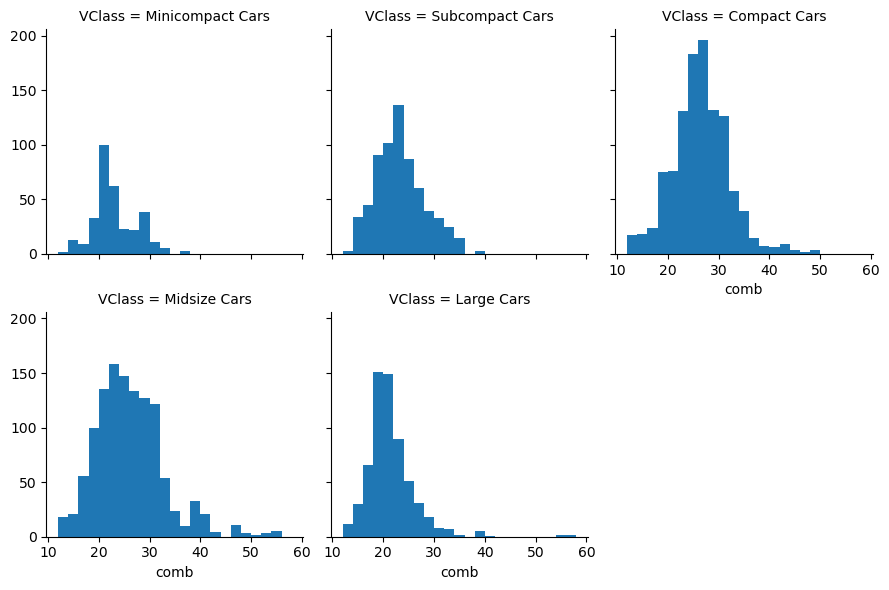

In [21]:
bin_edges = np.arange(12, 58+2, 2)

# Try experimenting with dynamic bin edges
# bin_edges = np.arange(-3, fuel_econ['comb'].max()+1/3, 1/3)

g = sb.FacetGrid(data = fuel_econ, col = 'VClass', col_wrap=3)
g.map(plt.hist, 'comb', bins = bin_edges);
plt.show()


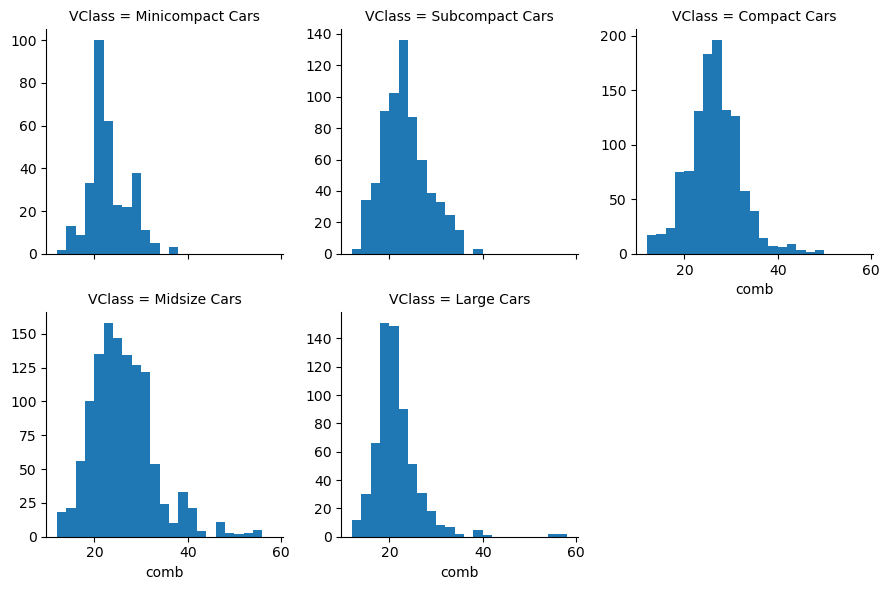

In [23]:
# Example with different y axis sizes (sharey)
bin_edges = np.arange(12, 58+2, 2)

g = sb.FacetGrid(data = fuel_econ, col = 'VClass', col_wrap=3, sharey=False)
g.map(plt.hist, 'comb', bins = bin_edges);
plt.show()

## Additional Variation
If you have many categorical levels to plot, then you might want to add more arguments to the FacetGrid object's initialization to facilitate clarity in the conveyance of information. The example below includes a categorical variable, "trans", that has 27 different transmission types. Setting col_wrap = 7 means that the plots will be organized into rows of 7 facets each, rather than a single long row of 27 plots.

Also, we want to have the facets for each transmission type in the decreasing order of combined fuel efficiency.

## Example 3.

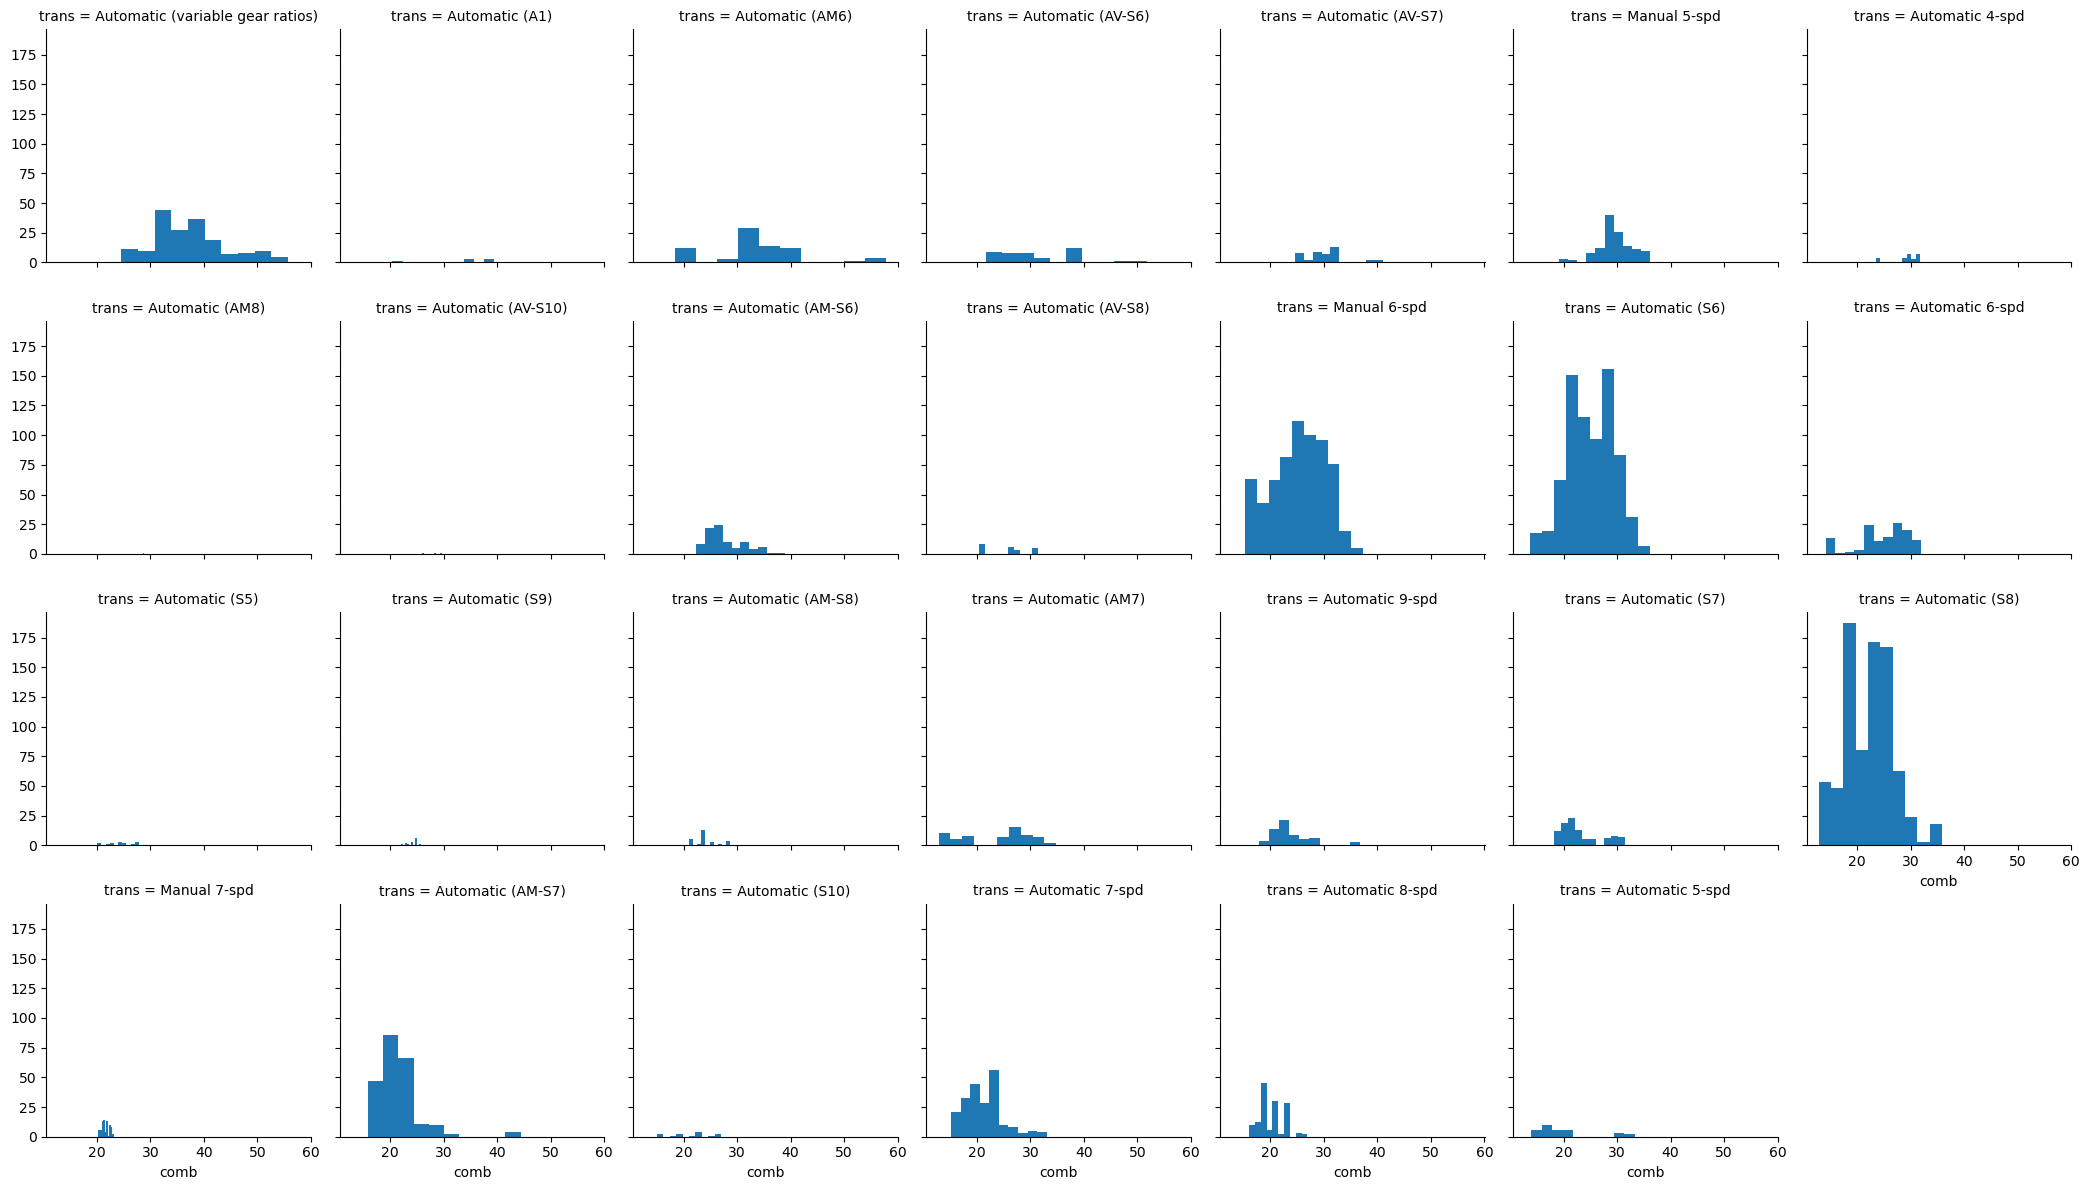

In [31]:
# Find the order in which you want to display the Facets
# For each transmission type, find the combined fuel efficiency
group_means = fuel_econ[['trans', 'comb']].groupby(['trans']).mean()

# Select only the list of transmission type in the decreasing order of combined fuel efficiency
group_order = group_means.sort_values(['comb'], ascending = False).index

# Use the argument col_order to display the FacetGrid in the desirable group_order
g = sb.FacetGrid(data = fuel_econ, col = 'trans', col_wrap = 7, col_order = group_order)
g.map(plt.hist, 'comb')
plt.show()